In [1]:
# Bayesian with MCMC - Gibbs sampling
# Simple example: Inference parameter p of Bernoulli distribution
import numpy as np
import edward as ed
from edward.models import Beta, Bernoulli, Empirical
import tensorflow as tf

In [2]:
# Model
p = Beta(1.0, 1.0) # This is the parameter to be estimated, Beta is the prior distribution of p
x = Bernoulli(probs=p, sample_shape=10000) # This is observation variable
qp = Empirical(tf.Variable(tf.zeros(10000))) # This is the posterior of p, it is an empirical distribution with 500 samples

In [3]:
# Data
x_data = np.random.binomial(1,0.2,size=10000) # Observations with p ~ 0.2
x_data[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [4]:
# Inference
inference = ed.Gibbs({p: qp}, data={x: x_data})
inference.initialize(n_iter=10000)
tf.global_variables_initializer().run()

for _ in range(inference.n_iter):
    info_dict = inference.update()
    inference.print_progress(info_dict)

inference.finalize()

10000/10000 [100%] ██████████████████████████████ Elapsed: 12s | Acceptance Rate: 1.000

In [7]:
sess = ed.get_session()
samples_p = [sess.run(qp) for i in range(10000)]
rmse = np.sqrt(np.mean(np.asarray([(sess.run(qp)-0.2)**2 for i in range(10000)])))
print('RMSE: ', rmse)

('RMSE: ', 0.0042974510240575683)


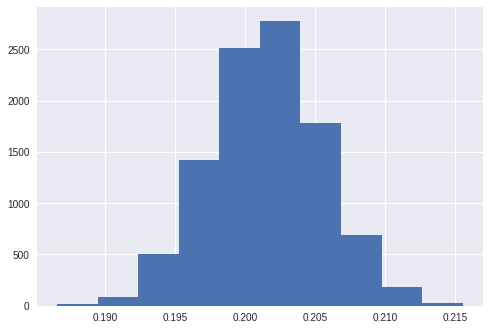

In [8]:
import matplotlib.pyplot as plt
plt.hist(samples_p)
plt.show()
